In [1]:
import arabic_reshaper
import finpy_tse as fpy
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
import numpy as np

In [3]:
class RIPlot:

    def __init__(self, ticker, start_date, end_date):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date

    def get_price(self):
        price_data = fpy.Get_Price_History(
            stock=self.ticker,
            start_date=self.start_date,
            end_date=self.end_date,
            ignore_date=False,
            adjust_price=True,
            show_weekday=False,
            double_date=True).rename(columns=str.lower).rename(columns={"adj final": "adj_final"})
        price_data = price_data[["date", "volume", "value", "adj_final"]]
        return price_data

    def retail_and_institutional_data(self):
        ri_data = fpy.Get_RI_History(
            stock=self.ticker,
            start_date=self.start_date,
            end_date=self.end_date,
            ignore_date=False,
            show_weekday=False,
            double_date=True).rename(columns=str.lower).drop(["ticker", "name", "market"], axis=1)
        return ri_data

    def plot_retail_and_institutional(self):
        hist_price = self.get_price()
        hist_ri = self.retail_and_institutional_data()
        main_df = hist_price.merge(hist_ri, on="date", how="left")
        main_df["power_of_buyer_r"] = main_df["vol_buy_r"] / main_df["no_buy_r"]
        main_df["power_of_seller_r"] = main_df["vol_sell_r"] / main_df["no_sell_r"]
        main_df["power_of_buyer_i"] = main_df["vol_buy_i"] / main_df["no_buy_i"]
        main_df["power_of_seller_i"] = main_df["vol_sell_i"] / main_df["no_sell_i"]

        fig, axs = plt.subplots(4, 1, sharex=True, gridspec_kw={'height_ratios': [4, 1, 1, 1]}, figsize=(16, 8))
        # Remove vertical space between axes
        fig.subplots_adjust(hspace=0)

        # Plot each graph
        axs[0].plot(main_df["date"], np.log(main_df["adj_final"]))
        axs[0].legend([get_display(arabic_reshaper.reshape(self.ticker))])
        axs[1].plot(main_df["date"], main_df[["power_of_buyer_r", "power_of_seller_r"]])
        axs[1].legend([get_display(arabic_reshaper.reshape("قدرتِ خریدِ حقیقی")),
                       get_display(arabic_reshaper.reshape("قدرتِ فروشِ حقیقی"))])
        axs[2].plot(main_df["date"], main_df[["power_of_buyer_i", "power_of_seller_i"]])
        axs[2].legend([get_display(arabic_reshaper.reshape("قدرتِ خریدِ حقوقی")),
                       get_display(arabic_reshaper.reshape("قدرتِ فروشِ حقوقی"))])
        axs[3].bar(main_df["date"], main_df["volume"])
        axs[3].legend([get_display(arabic_reshaper.reshape("حجم"))])

        return plt.show()

In [10]:
dana = RIPlot(ticker="دانا", start_date="1399-08-08", end_date="1401-08-08")

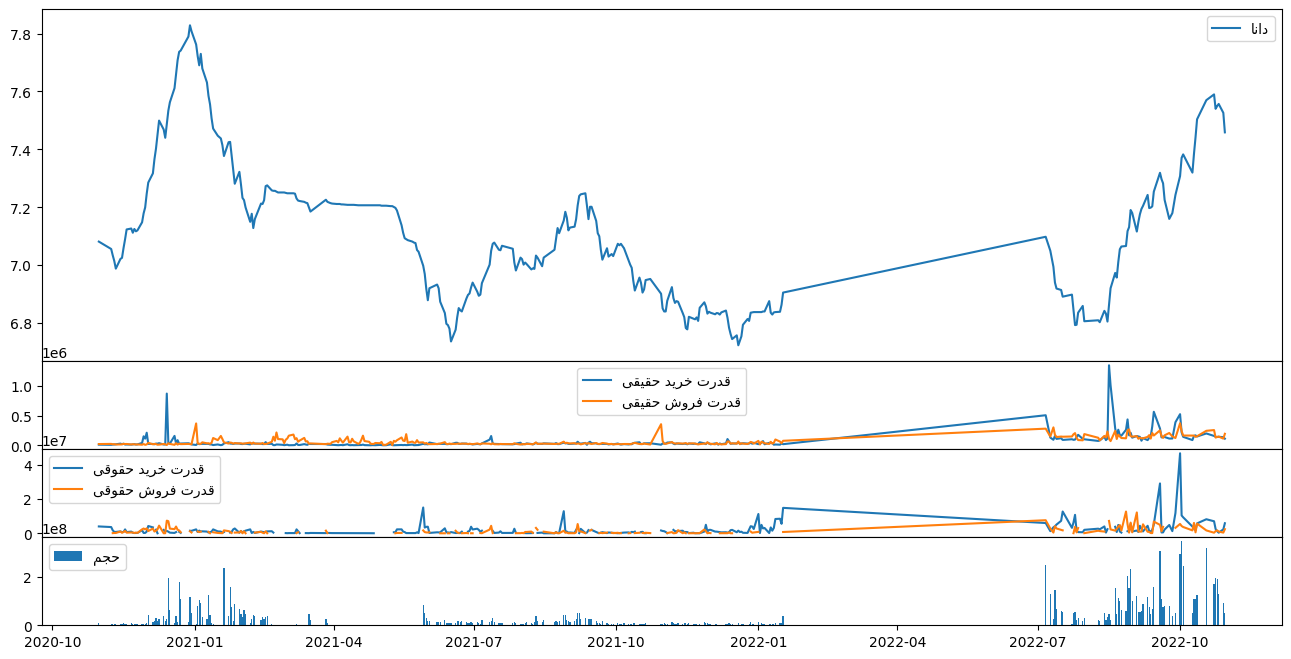

In [11]:
dana.plot_retail_and_institutional()